In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 1 # 学习率
iteration = 10
max_epoch = 200
milestones = [10, 65, 160]

weights = torch.tensor(1, requires_grad=True, dtype=torch.float32)
target = torch.zeros(1)
# Decays the learning rate of each parameter group by gamma once the number of epoch reaches one of the milestones
optimizer = optim.SGD([weights], lr=LR, momentum=0.9)
scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, # 调节的是优化器lr参数
                                              milestones=milestones, # milestones (list) – List of epoch indices. Must be increasing.
                                              gamma=0.1) # gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.

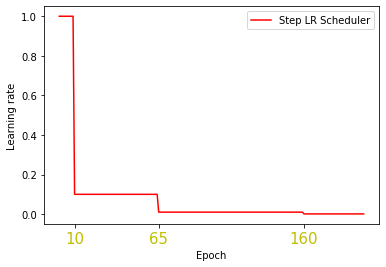

In [2]:
lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    lr_list.append(optimizer.param_groups[0]['lr'])
    epoch_list.append(epoch)
    for i in range(iteration):
        loss = torch.pow((weights - target), 2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # 位于内层循环

    scheduler_lr.step() # 位于外层循环

plt.plot(epoch_list, lr_list, label="Step LR Scheduler", color='red')
plt.xticks(milestones, color='y', size=15)
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()